<a href="https://colab.research.google.com/github/Rahul555ku56/Covid19_Dictation/blob/master/Project_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os, random
from imutils import paths

import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
tf.test.gpu_device_name()

''

# New Section

In [ ]:
!wget https://www.dropbox.com/s/oo9i9ttn3di0182/Covid_Dataset_2020_07_31.zip?dl=0
!unzip Covid_Dataset_2020_07_31.zip\?dl\=0
print("Data set successfully imported.")

--2023-04-28 03:54:30--  https://www.dropbox.com/s/oo9i9ttn3di0182/Covid_Dataset_2020_07_31.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/oo9i9ttn3di0182/Covid_Dataset_2020_07_31.zip [following]
--2023-04-28 03:54:31--  https://www.dropbox.com/s/raw/oo9i9ttn3di0182/Covid_Dataset_2020_07_31.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd9b5fa55ab2d1b759a4eb57878.dl.dropboxusercontent.com/cd/0/inline/B7A9Ai4Cqj9bH5POEUCWonVTwzDVAvDnvd5NbIGHZUGyOzkgfVbeJel0uxFKZdehgA5-t00JD753Ag-OM1TieaqdBXY_Z06UtB1uet8EH0_d8FlCnUZweJ7Gdz8vIwmkmSB7rxjCqrt37o_Kmm1VtUOqJInXDZBx3o7DTyvqY3po4g/file# [following]
--2023-04-28 03:54:31--  https://ucd9b5fa55ab2d1b759a4eb57878.dl.dropboxusercontent.com/cd/0/inline/B7A9Ai4Cqj9bH5POEUCWonVTwz

In [ ]:
# using the directory filepath to classify the images

path = "./Covid_Dataset/"
filepath = []

for root, directories, files in os.walk(path, topdown=False):
  for name in files:
    filepath.append(os.path.join(root, name))
        #print(os.path.join(root, name))
    #for name in directories:
        #print(os.path.join(root, name))

set = []
diagnosis = []
imgname = []

for i in filepath:
  imgname.append(i.split("/")[4])
  set.append(i.split("/")[2])
  diagnosis.append(i.split("/")[3])

df = pd.DataFrame(list(zip(imgname, set, diagnosis)),
                  columns = ['Filename', 'Set', 'Diagnosis'])

# metadata exported to a csv
df.to_csv('covid_metadata.csv', index=False)

df.sample(5)

,Filename,Set,Diagnosis
119,IM-0251-0001.jpeg,Train,Normal
95,NORMAL2-IM-0645-0001.jpeg,Train,Normal
35,NORMAL2-IM-1180-0001.jpeg,Test,Normal
133,IM-0627-0001.jpeg,Train,Normal
228,b0f1684d1ee90dc09deef015e29dae_jumbo.jpeg,Train,Covid


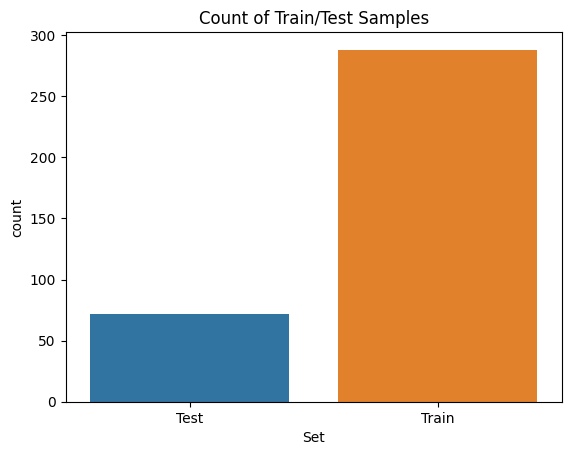

In [ ]:
# visualize breakdown of train/test data samples using 80/20 split
sns.countplot(data=df, x='Set')
plt.title('Count of Train/Test Samples');

In [ ]:
normal_images_train = list(paths.list_images(f"./Covid_Dataset/Train/Normal/"))
covid_images_train = list(paths.list_images(f"./Covid_Dataset/Train/Covid/"))

# Create function to display 5x5 grid of images
def plots_from_files(imspaths, figsize=(18,9), display_images=25, rows=1, cols=1, titles=None, maintitle=None):
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=40)
    #for i in range(len(imspaths)):
    for i in range(0, display_images):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

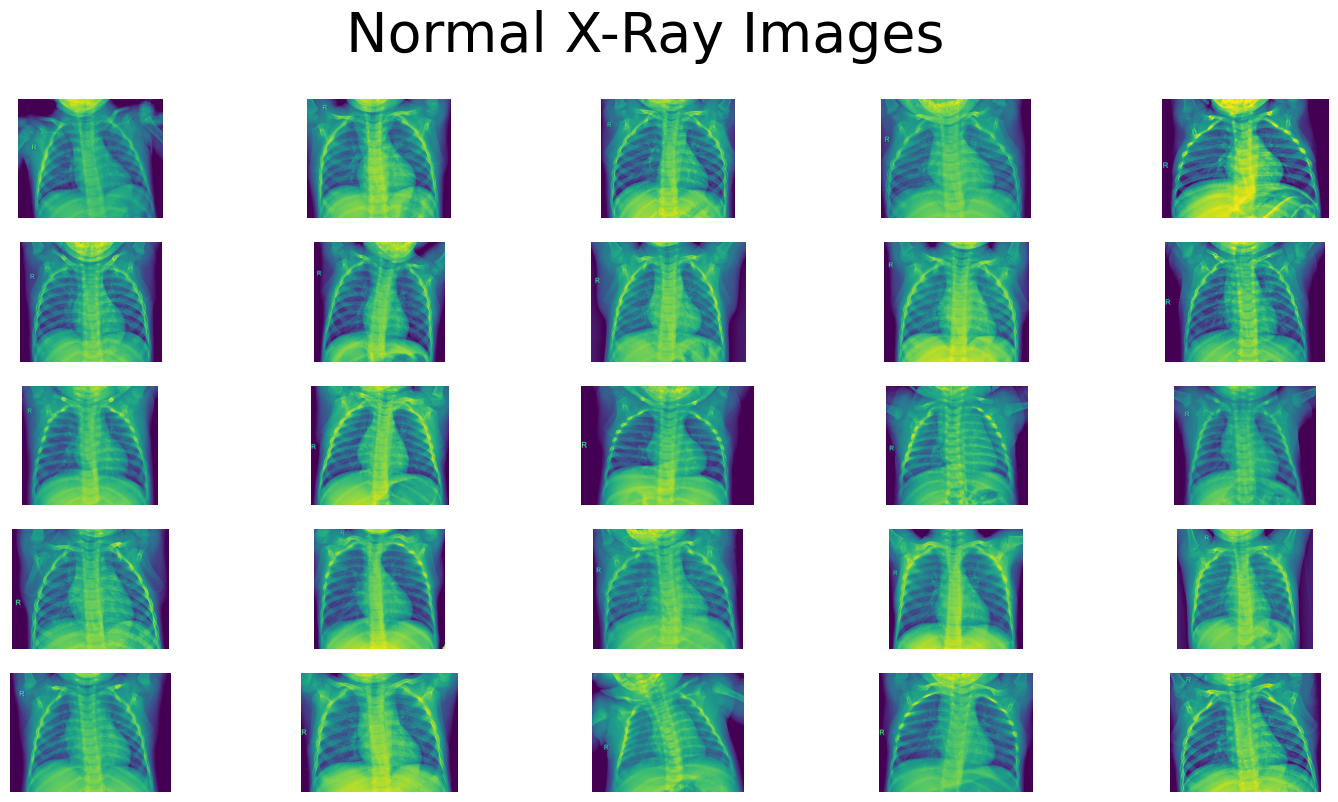

In [ ]:
plots_from_files(normal_images_train, rows=5, cols=5, display_images=25, maintitle="Normal X-Ray Images")

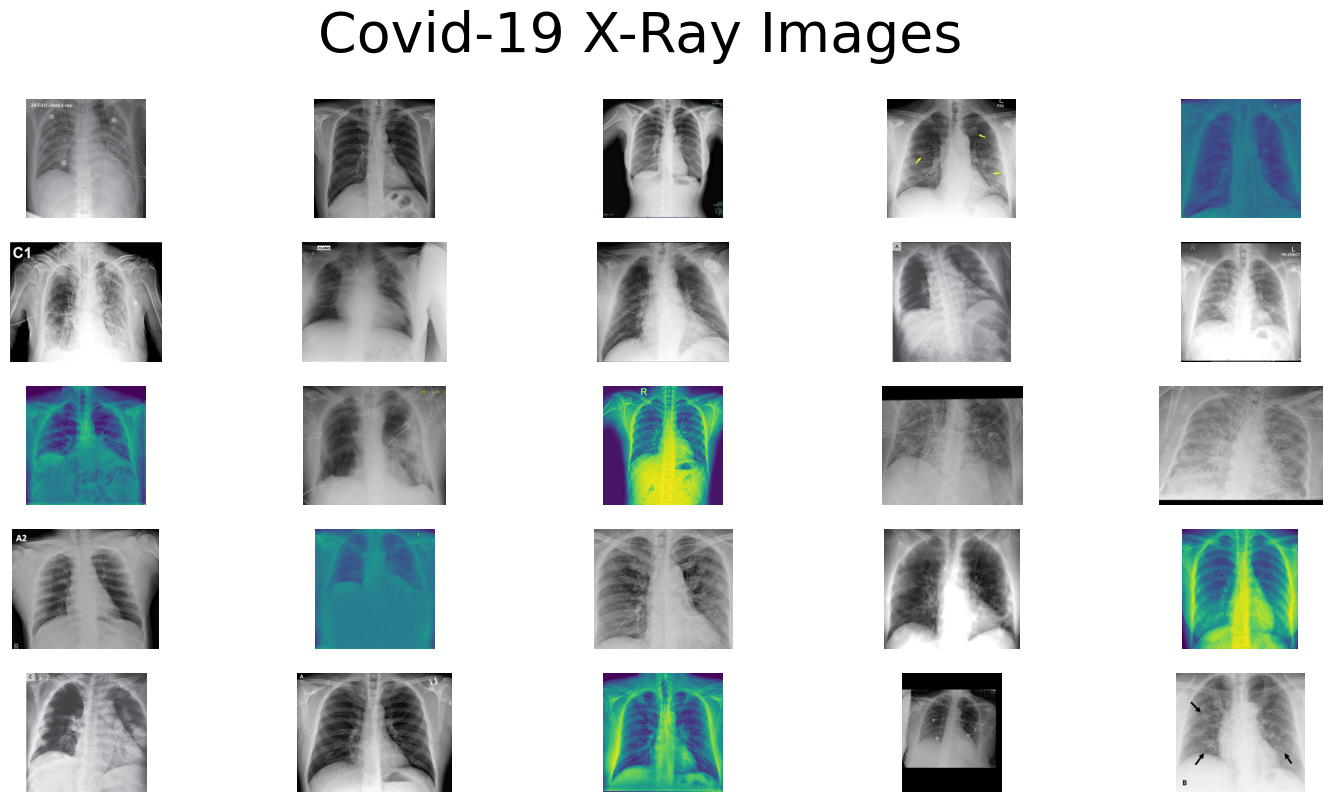

In [ ]:
plots_from_files(covid_images_train, rows=5, cols=5, display_images=25, maintitle="Covid-19 X-Ray Images")

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
import cv2
img=cv2.imread('/content/Covid_Dataset/Test/Covid/covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png')
img1=cv2.imread('/content/Covid_Dataset/Test/Covid/covid-19-pneumonia-53.jpg')
img2=cv2.imread('/content/Covid_Dataset/Test/Normal/NORMAL2-IM-1156-0001.jpeg')
img3=cv2.imread('/content/Covid_Dataset/Test/Normal/NORMAL2-IM-1200-0001.jpeg')

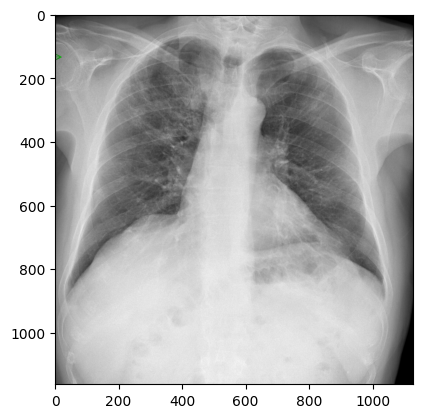

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

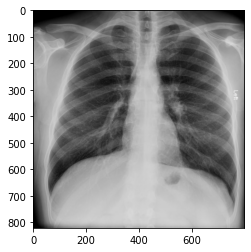

In [ ]:
plt.imshow(img1)

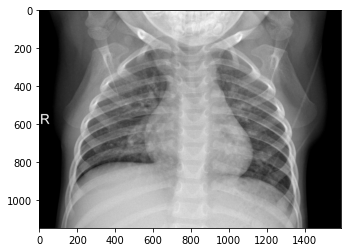

In [ ]:
plt.imshow(img2)

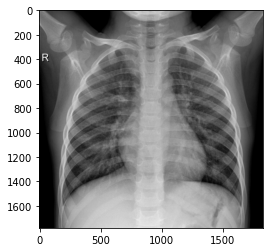

In [ ]:
plt.imshow(img3)

In [ ]:
# intialize number of epochs and batch size to train for
EPOCHS = 10
BS = 32

In [ ]:
# prepping & augmenting the images for loading into the model as inputs for training
train_data = image.ImageDataGenerator(
    rescale = 1./255, #normalize images
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
test_data = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
# converting image size, set the batch size (standard 224 by 224)
# feed the augmented images from previous step into the generator
train_generator = train_data.flow_from_directory(
    'Covid_Dataset/Train',
    target_size = (224,224),
    batch_size = BS,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
# print label for each class
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_generator = test_data.flow_from_directory(
    'Covid_Dataset/Test',
    target_size = (224,224),
    batch_size = BS,
    class_mode = 'binary'
)

Found 72 images belonging to 2 classes.


In [ ]:
%%time

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = EPOCHS,
    validation_data = test_generator,
    validation_steps = 2
)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
3/8 [==========>...................] - ETA: 1:19 - loss: 3.1316 - accuracy: 0.4271

In [ ]:
# checkpoint to save highest accuracy

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# save the model to file
if os.path.exists("covid19_model_adv.h5"):
   os.remove("covid19_model_adv.h5")
   print("Previous model deleted.")
else :
   print("The file does not exist.")

model.save("covid19_model_adv.h5")
print("Most recent model saved as: covid19_model_adv.h5")

Previous model deleted.
Most recent model saved as: covid19_model_adv.h5


In [ ]:
# save model weights
model.save_weights("covid19_model_weights.h5")
print("Model weights saved.")

Model weights saved.


In [ ]:
# save to JSON format
model_json = model.to_json()
with open('covid19_model_adv.json', 'w') as json_file:
  json_file.write(model_json)
print('Model saved to JSON format.')

Model saved to JSON format.


In [ ]:
model = load_model("covid19_model_adv.h5")
print('Model loaded from file.')

Model loaded from file.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
model.evaluate_generator(train_generator)

<ipython-input-95-e4ade065aa26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.19160883128643036, 0.9513888955116272]

In [ ]:
model.evaluate_generator(test_generator)

<ipython-input-96-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.1565476953983307, 0.9583333134651184]